# 어떤 무선청소기의 인기가 좋을까
다나와 : 온라인 쇼핑몰, 쇼셜커머스 등 전 상품에 대한 가격비교 사이트

In [1]:
url = 'http://search.danawa.com/dsearch.php?k1=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&module=goods&act=dispMain'

In [4]:
from selenium import webdriver

In [5]:
driver = webdriver.Chrome('C:/Users/hp/Desktop/최영조/chromedriver.exe')

In [6]:
driver.get(url)

In [8]:
html = driver.page_source

from bs4 import BeautifulSoup
soup = BeautifulSoup(html,'html.parser')

In [11]:
len(soup.select('div.prod_main_info'))

32

In [81]:
first_item = soup.select('div.prod_main_info')[0]
first_item.select('p.prod_name')[0].text.strip().split('\n')[0]

'원더스리빙 원더스 다이나킹 Z9'

In [63]:
first_item = soup.select('div.prod_main_info')[0]
spec = ''.join(''.join(first_item.select('div.spec_list')[0].text.strip().split('\n')).split('\t'))
spec

'핸디/스틱청소기  / 핸디+스틱형  / 무선형  / 전압: 28.8V / 헤파필터  / 듀얼싸이클론  / 6단계여과  / BLDC모터  / 흡입력 : 160AW  / 흡입력 : 22000Pa  / 먼지통용량: 0.7L / 충전시간 : 4시간30분  / 사용시간 : 1시간5분  / 배터리 : 리튬이온  / 용량 : 2500mAh  / 거치대  / 배터리잔량표시  / 셀프스탠딩  / 프리볼트  / 무게 : 2.5kg  / 소비전력 : 450W  / 브러쉬: 바닥, 펫, 멀티, 틈새, 솔형, 침구, 연장호스, 플렉스연장관 / 크기(가로x세로x깊이): 250x1096x198mm'

In [79]:
first_item = soup.select('div.prod_main_info')[0]
price = int(first_item.select('p.price_sect > a > strong')[0].text.replace(",",""))
price

299000

In [90]:
prod_data = []
items = soup.select('div.prod_main_info')
for i in range(len(items)):
    item = items[i]
    try:
        title = item.select('p.prod_name')[0].text.strip().split('\n')[0]
    except:
        title = ''
    try:
        spec = ''.join(''.join(item.select('div.spec_list')[0].text.strip().split('\n')).split('\t'))
    except:
        sepc = ""
    try:
        price = int(item.select('p.price_sect > a > strong')[0].text.replace(",",""))
    except:
        price = 0
    prod_data.append([title,spec,price])

print(len(prod_data))

32


In [93]:
prod_item = soup.select('div.prod_main_info')

In [5]:
def get_information(prod_item):
    prod_data = []
    items = prod_item
    for i in range(len(items)):
        item = items[i]
        try:
            title = item.select('p.prod_name')[0].text.strip().split('\n')[0]
        except:
            title = ''
        try:
            spec = ''.join(''.join(item.select('div.spec_list')[0].text.strip().split('\n')).split('\t'))
        except:
            sepc = ""
        try:
            price = int(item.select('p.price_sect > a > strong')[0].text.replace(",",""))
        except:
            price = 0
        prod_data.append([title,spec,price])

    return prod_data

In [ ]:
# 1페이지
url1 = 'http://search.danawa.com/dsearch.php?k1=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&module=goods&act=dispMain'

# 2페이지
url2 = '''http://search.danawa.com/dsearch.php?
    query=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&
    originalQuery=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&
    volumeType=allvs&page=2&limit=30&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods'''

# 3페이지
url3 = """http://search.danawa.com/dsearch.php?
    query=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&
    originalQuery=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&
    previousKeyword=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&
    volumeType=allvs&page=3&limit=30&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods&tab=goods"""

# query와 page 변수만 맞추면 나머지 url은 부가적인 부분이므로 무시해도 좋음

In [3]:
def search_url(key_word,page):
    url = '''http://search.danawa.com/dsearch.php?query={}&volumeType=allvs
    &page={}&limit=30&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods'''.format(key_word,page)
    return url

In [103]:
!pip install tqdm

# tqdm 모듈은 전체 과정 중 현재 진행 단계, 지금까지의 소요시간, 1회 작업 시 소요시간, 예상 완료시간 등을 확인할 수 있음
# 반복문 하나를 실행하는 것을 iteration이 실행되었다함

In [107]:
# 이런 식으로 사용한다.

import time
from tqdm import tqdm_notebook

total_page = 10
for page in tqdm_notebook(range(1,total_page+1)):
    time.sleep(2)



In [6]:
# 임포트부터 다시

from selenium import webdriver
import time
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook

driver = webdriver.Chrome('C:/Users/hp/Desktop/최영조/chromedriver.exe')
# 암묵적으로 웹 자원 로드를 위해 3초간 기다림
driver.implicitly_wait(3)

keyword = '무선청소기'
total_page = 10

informations=[]

for page in tqdm_notebook(range(1,total_page+1)):
    url = search_url(keyword,page)
    driver.get(url)
    # 페이지 로딩 완료를 위한 시간으로 5초씩 배당
    time.sleep(5)
    
    html = driver.page_source
    soup = BeautifulSoup(html)
    
    prod_item = soup.select('div.prod_main_info')
    
    prod_list = get_information(prod_item)
    informations = informations + prod_list
    

In [7]:
informations[3]

['삼성전자 제트 VS20R9078S2',
 '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 21.9V / 헤파필터 / 싸이클론 / 5단계여과 / 인버터모터 / 흡입력: 200W / 먼지통용량: 0.5L / 충전시간: 3시간30분 / 사용시간: 120분 / 배터리: 리튬이온 (2개) / 브러쉬: 바닥, 솔형, 틈새, 침구, 물걸레, 연장관 / 거치대 / 디스플레이표시창 / 물걸레 / 프리볼트 / 무게: 2.7kg / 색상:티탄+블루 / 소비전력: 550W / 알레르기인증(BAF) / 미세먼지인증(SLG) / 크기(가로x세로x깊이): 250x1136x215mm',
 799290]

In [115]:
len(informations)

302

In [122]:
import pandas as pd

In [123]:
data = pd.DataFrame(informations)
data.columns=['상품명','스펙_목록','가격']
data.to_excel('asd.xlsx',index=False)

# 데이터 전처리
1. 상품명 데이터에서 회사명과 제품명 분리
2. 일반 문자열로 저장된 스펙 목록을 필요한 스펙으로 분류 및 단위 통합

In [124]:
data.head()

,상품명,스펙_목록,가격
0,델로라 V11 파워 300W,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 29.6V / 헤파필터 ...,139000
1,원더스리빙 원더스 다이나킹 Z9,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 28.8V / 헤파필터 ...,299000
2,델로라 V11 파워 300W,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 29.6V / 헤파필터 / 싸...,139000
3,삼성전자 제트 VS20R9078S2,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 21.9V / 헤파필터 / 싸...,799330
4,샤오미 드리미 V10,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 25.2V / 헤파필터 / H...,171760


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 3 columns):
상품명      302 non-null object
스펙_목록    302 non-null object
가격       302 non-null int64
dtypes: int64(1), object(2)
memory usage: 7.2+ KB


In [127]:
data['상품명'][:10]

0                            델로라 V11 파워 300W
1                          원더스리빙 원더스 다이나킹 Z9
2                            델로라 V11 파워 300W
3                        삼성전자 제트 VS20R9078S2
4                                샤오미 드리미 V10
5    샤오미 SHUNZAO 차량용 무선청소기 2세대 Z1 PRO (해외구매)
6                          원더스리빙 원더스 다이나킹 Z9
7                          LG전자 코드제로 A9 A978
8                                 다이슨 V8 플러피
9                          LG전자 코드제로 A9 A951
Name: 상품명, dtype: object

In [131]:
data['상품명'][0].split(' ',1)

['델로라', 'V11 파워 300W']

In [133]:
company_list = []
product_list = []
for title in data['상품명']:
    company_list.append(title.split(' ',1)[0])
    product_list.append(title.split(' ',1)[1])

print(len(company_list))
print(company_list[:5])
print(len(product_list))
print(product_list[:5])

302
['델로라', '원더스리빙', '델로라', '삼성전자', '샤오미']
302
['V11 파워 300W', '원더스 다이나킹 Z9', 'V11 파워 300W', '제트 VS20R9078S2', '드리미 V10']


In [138]:
len(data['스펙_목록'][0].split(' / '))

21

In [139]:
len(data['스펙_목록'][1].split(' / '))

23

In [141]:
first_product = data['스펙_목록'][0].split(' / ')
first_product

['핸디/스틱청소기 ',
 '핸디+스틱형 ',
 '무선형 ',
 '전압: 29.6V',
 '헤파필터 ',
 '싸이클론 ',
 '4단계여과 ',
 'BLDC모터 ',
 '흡입력 : 22000Pa ',
 '먼지통용량: 0.6L',
 '충전시간 : 5시간 ',
 '사용시간 : 1시간10분 ',
 '배터리 : 리튬이온 ',
 '용량 : 2500mAh ',
 '브러쉬: 바닥 , 솔형 , 틈새 , 침구 , 연장관 ',
 'LED라이트 ',
 '거치대 ',
 '무게 : 3.89kg ',
 '색상:레드, 블랙 ',
 '소비전력 : 300W ',
 '크기(가로x세로x깊이): 239x1255x105mm']

추출할 정보: 카테고리, 사용시간, 흡입력
- 카테고리: 리스트의 첫 번째 위치
- 사용시간 :  사용시간: 00분처럼 사용시간이라는 문구가 명시돼있음
- 흡입력 : 흡입력: 000Pa,000AW 같은 문구가 명시되어있음

In [142]:
category = first_product[0]
category

'핸디/스틱청소기 '

In [145]:
for spec in first_product:
    if '사용시간' in spec:
        time_spec = spec.split(':')[1].strip()
    elif '흡입력' in spec:
        suction_spec = spec.split(':')[1].strip()
print(time_spec)
print(suction_spec)

1시간10분
22000Pa


In [146]:
category_list=[]
time_spec_list=[]
suction_spec_list=[]

for long_spec in data['스펙_목록']:
    spec_list = long_spec.split(' / ')
    category_list.append(spec_list[0].strip())
    for spec in spec_list:
        if '사용시간' in spec:
            time_spec = spec.split(':')[1].strip()
        elif '흡입력' in spec:
            suction_spec = spec.split(':')[1].strip()
    time_spec_list.append(time_spec)
    suction_spec_list.append(suction_spec)

print(category_list[:3])
print(time_spec_list[:3])
print(suction_spec_list[:3])
    

['핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기']
['1시간10분', '1시간5분', '1시간10분']
['22000Pa', '22000Pa', '22000Pa']


In [147]:
time_spec_list

['1시간10분',
 '1시간5분',
 '1시간10분',
 '120분',
 '1시간',
 '30분',
 '1시간5분',
 '80분',
 '40분',
 '80분',
 '2시간',
 '60분',
 '42분',
 '1시간',
 '17분',
 '30분',
 '1시간20분',
 '40분',
 '40분',
 '1시간',
 '30분',
 '20분',
 '80분',
 '45분',
 '80분',
 '60분',
 '60분',
 '55분',
 '1시간',
 '50분',
 '1시간20분',
 '1시간',
 '60분',
 '120분',
 '1시간',
 '50분',
 '30분',
 '40분',
 '1시간',
 '2시간',
 '45분',
 '60분',
 '10분',
 '40분',
 '18분',
 '12분',
 '40분',
 '2시간',
 '35분',
 '1시간',
 '48분',
 '30분',
 '80분',
 '55분',
 '40분',
 '2시간',
 '30분',
 '45분',
 '45분',
 '12분',
 '60분',
 '40분',
 '40분',
 '60분',
 '20분',
 '1시간20분',
 '40분',
 '40분',
 '40분(강), 70분(약)',
 '25분',
 '13분29초',
 '50분',
 '40분',
 '80분',
 '42분',
 '30분',
 '40분',
 '40분',
 '30분',
 '30분',
 '40분',
 '40분',
 '30분',
 '40분',
 '40분',
 '60분',
 '40분',
 '40분',
 '40분',
 '40분',
 '80분',
 '35분',
 '30분',
 '40분',
 '80분',
 '60분',
 '20~30분',
 '50분',
 '30분',
 '45분',
 '80분',
 '40분',
 '50분',
 '60분',
 '30분',
 '20분',
 '24분',
 '48분',
 '1시간20분',
 '1시간20분',
 '20분',
 '42분',
 '30분',
 '60분',
 '48분',
 '30분',
 '35분',
 '60분',
 '60분',
 '1시

In [164]:
# 시간 통일

def convert_time_minute(time):
    try:
        if '시간' in time:
            hour = time.split('시간')[0]
            if '분' in time:
                minute = time.split('시간')[-1].split('분')[0]
            else:
                minute = 0
        else:
            hour = 0
            minute = time.split('분')[0]
        return int(hour)*60+int(minute)
    except:
        return None

In [179]:
# 기억: 이런식으로 작성하면 오류가 날 가능성이 매우매우 높으므로 함수 작성시 항상 try,except return None 구문을 이용할 것

def convert_time_minute2(time):
    if '시간' in time:
        hour = time.split('시간')[0]
        if '분' in time:
            minute = time.split('시간')[-1].split('분')[0]
        else:
            minute = 0
    else:
        hour = 0
        minute = time.split('분')[0]
    return int(hour)*60+int(minute)

In [153]:
a= ['1시간30분','3시간','60분','2시간15분']
for i in a:
    j=convert_time_minute(i)
    print(j)

90
180
60
135


In [166]:
time_spec_Series = pd.Series(time_spec_list).map(convert_time_minute)
time_spec_Series

0       70.0
1       65.0
2       70.0
3      120.0
4       60.0
       ...  
297     60.0
298     45.0
299     40.0
300     40.0
301    110.0
Length: 302, dtype: float64

In [170]:
data['지속시간']=time_spec_Series
data.head()

,상품명,스펙_목록,가격,지속시간
0,델로라 V11 파워 300W,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 29.6V / 헤파필터 ...,139000,70.0
1,원더스리빙 원더스 다이나킹 Z9,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 28.8V / 헤파필터 ...,299000,65.0
2,델로라 V11 파워 300W,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 29.6V / 헤파필터 / 싸...,139000,70.0
3,삼성전자 제트 VS20R9078S2,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 21.9V / 헤파필터 / 싸...,799330,120.0
4,샤오미 드리미 V10,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 25.2V / 헤파필터 / H...,171760,60.0


In [172]:
# 무선청소기 흡입력 단위 통일시키기

# 대략 1W = 1AW = 100PA로 간주

In [174]:
suction_spec_list

['22000Pa',
 '22000Pa',
 '22000Pa',
 '200W',
 '22000Pa',
 '12,000Pa',
 '22000Pa',
 '140W',
 '155AW',
 '140W',
 '140W',
 '220AW',
 '220AW',
 '26000Pa',
 '12,000Pa',
 '7,000Pa',
 '150W',
 '150W',
 '140W',
 '185AW',
 '185AW',
 '60W',
 '140W',
 '9000Pa',
 '140W',
 '200W',
 '20000Pa',
 '20000Pa',
 '200W',
 '200W',
 '150W',
 '26000Pa',
 '26000Pa',
 '200W',
 '22000Pa',
 '22000Pa',
 '22000Pa',
 '22000Pa',
 '185AW',
 '200W',
 '200W',
 '160AW',
 '160AW',
 '130W',
 '6,200Pa',
 '6,200Pa',
 '6,200Pa',
 '200W',
 '10000Pa',
 '22000Pa',
 '22000Pa',
 '22000Pa',
 '22000Pa',
 '22000Pa',
 '155AW',
 '200W',
 '5,000Pa',
 '25000Pa',
 '100AW',
 '35AW',
 '35AW',
 '155AW',
 '9000Pa',
 '9000Pa',
 '9000Pa',
 '9000Pa',
 '9000Pa',
 '18500Pa',
 '18500Pa',
 '6000Pa',
 '6000Pa',
 '6000Pa',
 '155W',
 '155W',
 '155W',
 '155W',
 '7000Pa',
 '7000Pa',
 '19000Pa',
 '19000Pa',
 '150W',
 '155AW',
 '155AW',
 '115W',
 '150W',
 '200W',
 '115AW',
 '115AW',
 '155AW',
 '7000Pa',
 '140W',
 '18000Pa',
 '100AW',
 '12000Pa',
 '140W',
 

In [180]:
def get_suction(value):
    try:
        value = value.upper()
        if 'AW' in value or 'W' in value:
            result = value.replace("A","").replace("W","")
            result = int(result.replace(',',''))
        elif "PA" in value:
            result = value.replace("PA","")
            result = int(result.replace(",",""))/100
        else:
            result = None
        return result
    except:
        return None

In [182]:
ls = ["100AW","50pa","31w"]
for i in ls:
    print(get_suction(i))

100
0.5
31


In [185]:
data['성능'] = pd.Series(suction_spec_list).map(get_suction)
data

,상품명,스펙_목록,가격,지속시간,성능
0,델로라 V11 파워 300W,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 29.6V / 헤파필터 ...,139000,70.0,220.0
1,원더스리빙 원더스 다이나킹 Z9,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 28.8V / 헤파필터 ...,299000,65.0,220.0
2,델로라 V11 파워 300W,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 29.6V / 헤파필터 / 싸...,139000,70.0,220.0
3,삼성전자 제트 VS20R9078S2,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 21.9V / 헤파필터 / 싸...,799330,120.0,200.0
4,샤오미 드리미 V10,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 25.2V / 헤파필터 / H...,171760,60.0,220.0
...,...,...,...,...,...
297,샤오미 드리미 V9B,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 25.2V / 헤파필터 / 싸...,141100,60.0,120.0
298,테팔 TY7231,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 22V / 싸이클론 / DC모...,211000,45.0,120.0
299,한경희생활과학 VS-1000MB,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 전압: 14.4V / 헤파필터 / 싸...,83910,40.0,120.0
300,블랙앤데커 DVJ315B,핸디/스틱청소기 / 핸디형 / 무선형 / 전압: 10.8V / 흡입력: 18AW /...,63000,40.0,18.0


In [187]:
# time_spec_Series
suction_Series = pd.Series(suction_spec_list).map(get_suction)

# category_list
# company_list
# product_list

In [189]:
df = pd.DataFrame([])
df['카테고리'] = category_list
df['회사명'] = company_list
df['제품'] = product_list
df['가격'] = data['가격']
df['사용시간'] = time_spec_Series
df['흡입력'] = suction_Series
df.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,델로라,V11 파워 300W,139000,70.0,220.0
1,핸디/스틱청소기,원더스리빙,원더스 다이나킹 Z9,299000,65.0,220.0
2,핸디/스틱청소기,델로라,V11 파워 300W,139000,70.0,220.0
3,핸디/스틱청소기,삼성전자,제트 VS20R9078S2,799330,120.0,200.0
4,핸디/스틱청소기,샤오미,드리미 V10,171760,60.0,220.0


In [191]:
df['카테고리'].value_counts()

핸디/스틱청소기    249
물걸레청소기       31
차량용청소기       17
침구청소기         3
업소용청소기        1
진공청소기         1
Name: 카테고리, dtype: int64

### 잠시 기억할 것
ㅇㄹ.isin([리스트])

In [9]:
import pandas as pd

In [16]:
df = pd.read_excel('April5.xlsx',index_col=0)
df.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,델로라,V11 파워 300W,139000,70.0,220
1,핸디/스틱청소기,원더스리빙,원더스 다이나킹 Z9,299000,65.0,220
2,핸디/스틱청소기,델로라,V11 파워 300W,139000,70.0,220
3,핸디/스틱청소기,삼성전자,제트 VS20R9078S2,799330,120.0,200
4,핸디/스틱청소기,샤오미,드리미 V10,171760,60.0,220


In [17]:
df['카테고리'].value_counts()

핸디/스틱청소기    249
물걸레청소기       31
차량용청소기       17
침구청소기         3
업소용청소기        1
진공청소기         1
Name: 카테고리, dtype: int64

In [24]:
final = df[df['카테고리'].isin(['핸디/스틱청소기'])]
final.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,델로라,V11 파워 300W,139000,70.0,220
1,핸디/스틱청소기,원더스리빙,원더스 다이나킹 Z9,299000,65.0,220
2,핸디/스틱청소기,델로라,V11 파워 300W,139000,70.0,220
3,핸디/스틱청소기,삼성전자,제트 VS20R9078S2,799330,120.0,200
4,핸디/스틱청소기,샤오미,드리미 V10,171760,60.0,220


In [25]:
final.to_excel('aaa.xlsx',index=False)

### 가격, 사용시간, 흡입력 등 특징에 따른 인기 제품 간 비교 분석을 진행

In [31]:
sort_by_suction = final.sort_values(by='흡입력',ascending=False)
sort_by_suction.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
32,핸디/스틱청소기,다이슨,V10 플러피,654650,60.0,260
13,핸디/스틱청소기,샤오미,SHUNZAO Z11 PRO,175000,60.0,260
31,핸디/스틱청소기,샤오미,SHUNZAO Z11,153640,60.0,260
97,핸디/스틱청소기,DIBEA,M500 퀀텀,259000,50.0,250
271,핸디/스틱청소기,롯데알미늄,LS295,169000,35.0,250


In [33]:
sort_by_duration = final.sort_values(by='사용시간',ascending=False)
sort_by_duration.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
207,핸디/스틱청소기,샤오미,이지에 YE-01,28490,120.0,150
242,핸디/스틱청소기,삼성전자,제트 VS20T9279S6,1185530,120.0,200
47,핸디/스틱청소기,삼성전자,제트 VS20T9278S3,1186540,120.0,200
55,핸디/스틱청소기,삼성전자,제트 VS20T9279S6CS,1274560,120.0,200
133,핸디/스틱청소기,삼성전자,제트 VS20T8282B2CS,1357880,120.0,200


In [35]:
# 두 개의 컬럼을 기준으로 정렬, 사용시간이 우선순위

sort_by_two_standard = final.sort_values(by=['사용시간','흡입력'],ascending=False)
sort_by_two_standard.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
3,핸디/스틱청소기,삼성전자,제트 VS20R9078S2,799330,120.0,200
33,핸디/스틱청소기,삼성전자,제트 VS20R9078S3,883620,120.0,200
39,핸디/스틱청소기,삼성전자,제트 VS20T9278S7,1216760,120.0,200
47,핸디/스틱청소기,삼성전자,제트 VS20T9278S3,1186540,120.0,200
55,핸디/스틱청소기,삼성전자,제트 VS20T9279S6CS,1274560,120.0,200


### 가성비 좋은 제품 살펴보기
우선 각 모델을 가격, 흡입력, 사용시간의 평균 들과 비교하겠음

In [43]:
price_mean = final['가격'].mean()
suction_mean = final['흡입력'].mean()
duration_mean = final['사용시간'].mean()
print("가격 평균: {}, 흡입력 평균: {}, 사용시간 평균: {}".format(price_mean,suction_mean,duration_mean))

가격 평균: 374321.0843373494, 흡입력 평균: 155.93172690763052, 사용시간 평균: 47.231404958677686


In [54]:
# 가격은 평균 이하, 흡입력과 사용시간은 평균 이상인 제품은 무엇이 있을까.

cond = (final['가격']<=price_mean)&(final['흡입력']>=suction_mean)&(final['사용시간']>=duration_mean)
good_products = final[cond]
good_products.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,델로라,V11 파워 300W,139000,70.0,220
1,핸디/스틱청소기,원더스리빙,원더스 다이나킹 Z9,299000,65.0,220
2,핸디/스틱청소기,델로라,V11 파워 300W,139000,70.0,220
4,핸디/스틱청소기,샤오미,드리미 V10,171760,60.0,220
6,핸디/스틱청소기,원더스리빙,원더스 다이나킹 Z9,299000,65.0,220


In [55]:
final_products = good_products.sort_values(by=['사용시간','흡입력'],ascending=False)
final_products.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,델로라,V11 파워 300W,139000,70.0,220
2,핸디/스틱청소기,델로라,V11 파워 300W,139000,70.0,220
1,핸디/스틱청소기,원더스리빙,원더스 다이나킹 Z9,299000,65.0,220
6,핸디/스틱청소기,원더스리빙,원더스 다이나킹 Z9,299000,65.0,220
13,핸디/스틱청소기,샤오미,SHUNZAO Z11 PRO,175000,60.0,260


### 데이터 시각화
seaborn의 scatterplot() 함수를 이용<br>
차트의 한글 깨짐 방지를 위한 코드 추가

In [52]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# 그래프에서 한글 표기를 위한 글꼴 변경(윈도우)
font_path = ''
font_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font',family = font_name)

%matplotlib inline

In [53]:
len(final_products)

34

In [56]:
len(final)

249

In [59]:
final.isnull().sum()

카테고리    0
회사명     0
제품      0
가격      0
사용시간    7
흡입력     0
dtype: int64

In [61]:
# 정확한 차트를 그리기 위해 빈 값이 포함되어있으면 삭제하도록 하자.

chart_data = final.dropna(axis=0)
len(chart_data)

242

In [65]:
# 흡입력.사용시간의 최대,최소,평균
suction_max = chart_data['흡입력'].max()
suction_min = chart_data['흡입력'].min()
suction_mean = chart_data['흡입력'].mean()

duration_max = chart_data['사용시간'].max()
duration_min = chart_data['사용시간'].min()
duration_mean = chart_data['사용시간'].mean()


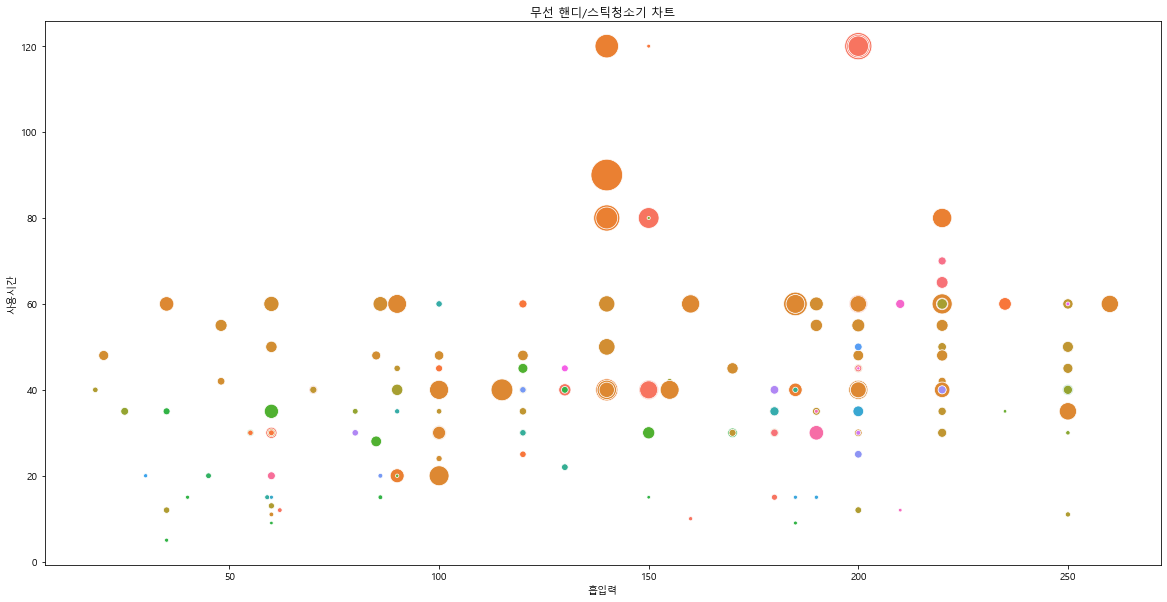

In [64]:
# 데이터의 분포를 그림, hue는 변수별로 색을 다르게 함

plt.figure(figsize=(20,10))
plt.title("무선 핸디/스틱청소기 차트")

# sizes 튜플은 minimum과 maximum
sns.scatterplot(x='흡입력',y='사용시간',size = '가격',hue=chart_data['회사명'],data=chart_data,sizes=(10,1000),legend=False)

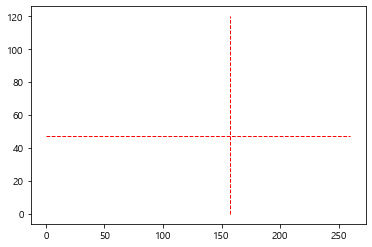

In [69]:
# lw는 linewidth, 위 분포도에 합칠 것, 그래프의 빨간 선은 흡입력과 사용시간의 평균시간

plt.plot([0,suction_max],[duration_mean,duration_mean],'r--',lw=1)     
plt.plot([suction_mean,suction_mean],[0,duration_max],'r--',lw=1)

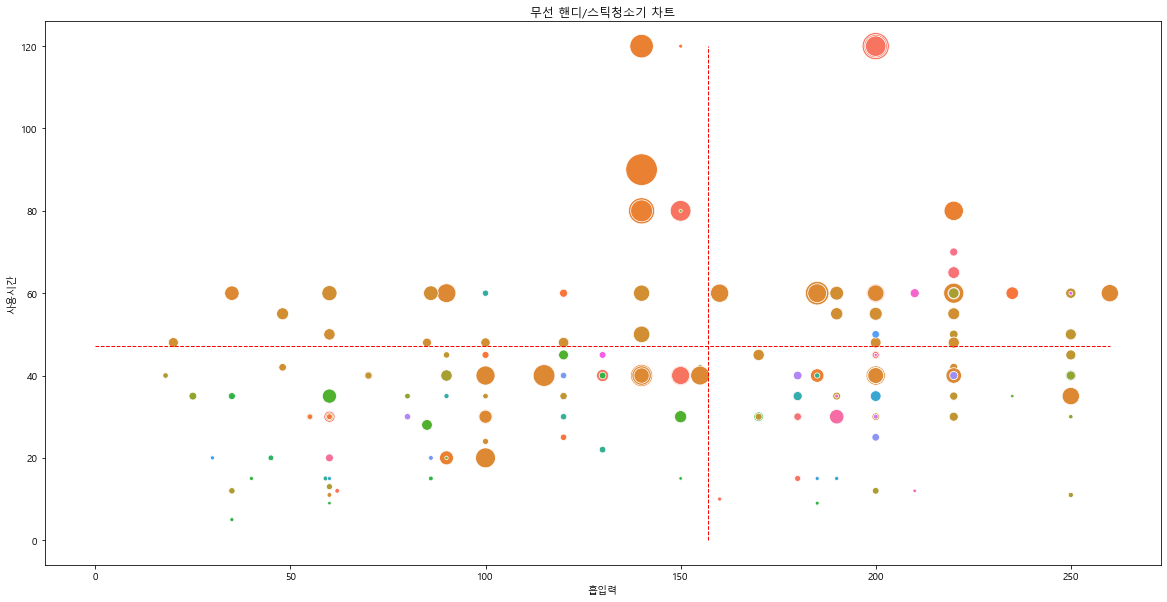

In [70]:
plt.figure(figsize=(20,10))
plt.title("무선 핸디/스틱청소기 차트")
sns.scatterplot(x='흡입력',y='사용시간',size = '가격',hue=chart_data['회사명'],data=chart_data,sizes=(10,1000),legend=False)
plt.plot([0,suction_max],[duration_mean,duration_mean],'r--',lw=1)     
plt.plot([suction_mean,suction_mean],[0,duration_max],'r--',lw=1)
plt.show()

# 인기제품의 시각화

In [72]:
# 인기있는 상위 20개의 제품

chart_data_selected = chart_data[:20]
chart_data_selected.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,델로라,V11 파워 300W,139000,70.0,220
1,핸디/스틱청소기,원더스리빙,원더스 다이나킹 Z9,299000,65.0,220
2,핸디/스틱청소기,델로라,V11 파워 300W,139000,70.0,220
3,핸디/스틱청소기,삼성전자,제트 VS20R9078S2,799330,120.0,200
4,핸디/스틱청소기,샤오미,드리미 V10,171760,60.0,220


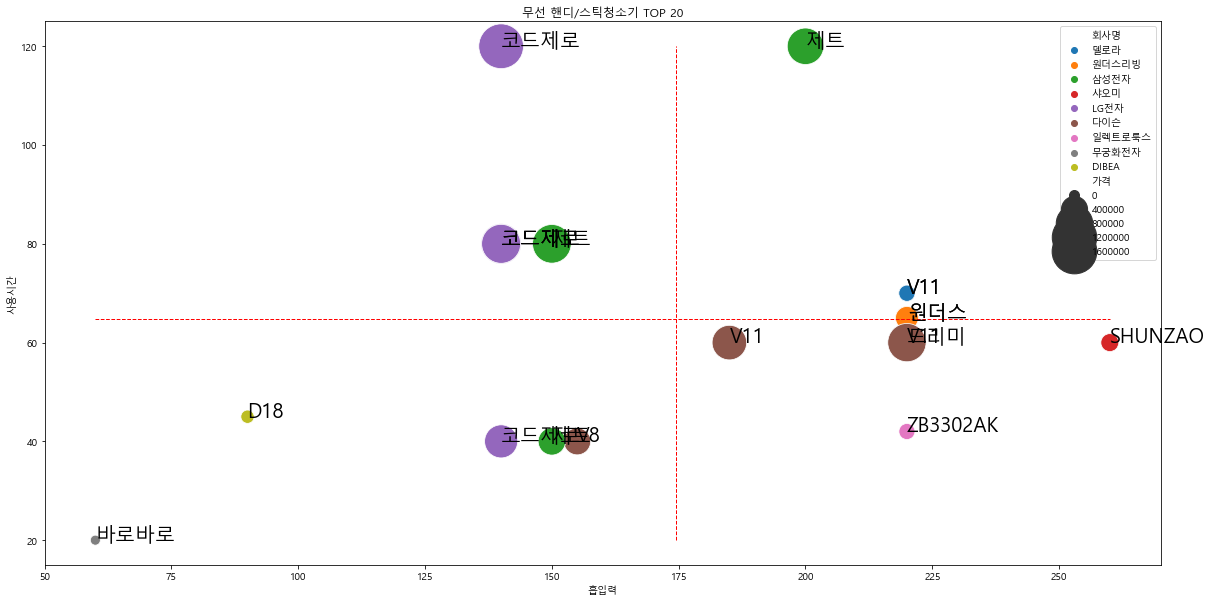

In [87]:
# 흡입력.사용시간의 최대,최소,평균
suction_max = chart_data_selected['흡입력'].max()
suction_min = chart_data_selected['흡입력'].min()
suction_mean = chart_data_selected['흡입력'].mean()

duration_max = chart_data_selected['사용시간'].max()
duration_min = chart_data_selected['사용시간'].min()
duration_mean = chart_data_selected['사용시간'].mean()

plt.figure(figsize=(20,10))
plt.title("무선 핸디/스틱청소기 TOP 20")

# 헷갈리게도 size와 sizes 옵션이 따로 있음

sns.scatterplot(x='흡입력',y='사용시간',size = '가격',
                hue=chart_data_selected['회사명'],
                data=chart_data_selected,
                sizes=(100,2000),
               )
plt.plot([suction_min,suction_max],[duration_mean,duration_mean],'r--',lw=1)     
plt.plot([suction_mean,suction_mean],[duration_min,duration_max],'r--',lw=1)

# iterrows ??

for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    # x,y는 텍스트가 입력될 위치실제로 입력되는 값은 s 
    plt.text(x,y,s,size=20)

plt.show()

# size를 이미 가격으로 지정함

In [78]:
chart_data_selected['회사명'].unique()

array(['델로라', '원더스리빙', '삼성전자', '샤오미', 'LG전자', '다이슨', '일렉트로룩스', '무궁화전자',
       'DIBEA'], dtype=object)

#### 범례를 회사명까지만 나오게는 할 수 없을까?